## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorMean = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumorMedian = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumorVar = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumorStdDev = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumorSEM = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

statSummary = pd.DataFrame({
    "Mean": tumorMean,
    "Median": tumorMedian,
    "Variance": tumorVar,
    "Standard Deviation": tumorStdDev,
    "SEM": tumorSEM
})

statSummary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
regCount = combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()

count_df = pd.DataFrame({
    "Treatment Regimen Count": regCount
})

count_df

,Treatment Regimen Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


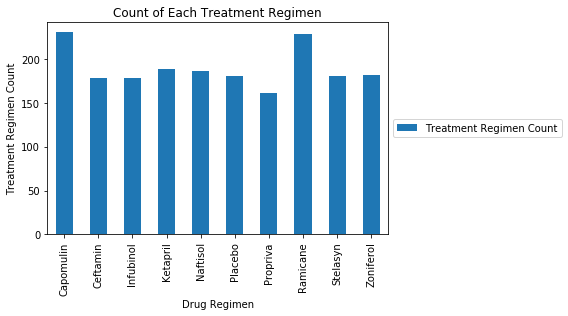

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regBarPandas = count_df.plot(kind="bar", figsize=(8,4.5), legend=False, title="Count of Each Treatment Regimen")
regBarPandas.set_ylabel("Treatment Regimen Count")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [5]:
indexReset_count_df = count_df.reset_index()
indexReset_count_df

,Drug Regimen,Treatment Regimen Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


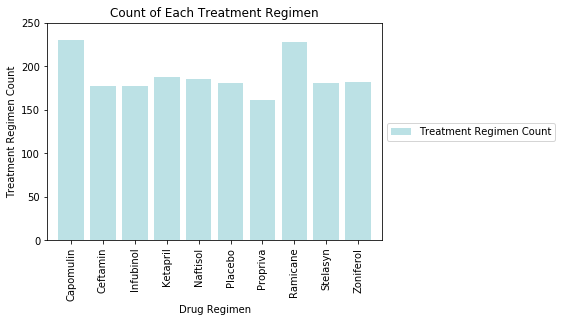

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = indexReset_count_df["Drug Regimen"]
y_axis = indexReset_count_df["Treatment Regimen Count"]

plt.bar(x_axis, y_axis, color='#7ac5cd', alpha=0.5, align="center", label="Treatment Regimen Count")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)

plt.title("Count of Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Regimen Count")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Pie plots

In [7]:
genderCount = combined_data.groupby(["Sex"])["Mouse ID"].count()

gender_df = pd.DataFrame({
    "Gender Distribution": genderCount
})

gender_df

,Gender Distribution
Sex,
Female,935
Male,958


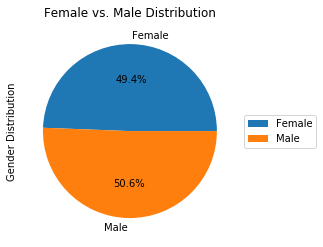

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_list = gender_df.keys()

gender_pie = gender_df.plot(kind="pie", y=gender_list, title="Female vs. Male Distribution", autopct="%1.1f%%")

plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [8]:
indexReset_gender_df = gender_df.reset_index()
indexReset_gender_df

,Sex,Gender Distribution
0,Female,935
1,Male,958


<function matplotlib.pyplot.show(*args, **kw)>

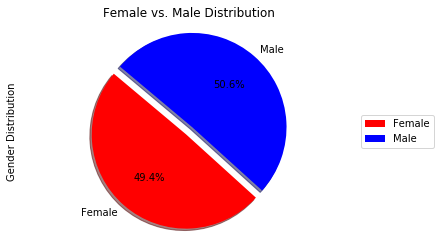

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gendDist = indexReset_gender_df["Gender Distribution"]
sexLabels = indexReset_gender_df["Sex"]
colors = ["red", "blue"]
explode = (0.1, 0)

plt.pie(gendDist, explode=explode, labels=sexLabels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Female vs. Male Distribution")
plt.ylabel("Gender Distribution")
plt.axis("equal")
plt.show

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# index the final tumor volume

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen